# Question 1
Implement the delta training rule for a two-input linear unit. Train it to fit the target concept -2 + x1 + x2 > 0. You can (uniformly) randomly select x1 and x2 from -1000 to + 1000. Plot the error E as a function of the number of training iterations. Plot the decision surface after 5, 10, 50, 100, 500, … iterations.  (20 points)

*Extra Credit: Try this using various constant values for η and using a decaying learning rate of η0 / i for the ith iteration. Which works better? (5 points)*

In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt

### generate_data(x_min_range, x_max_range, N, m):
Generates a data array used as the training examples

In [32]:
def generate_data(x_min_range, x_max_range, N, m):
    data = np.random.uniform(x_min_range,x_max_range,size=[N,m])
    data = np.concatenate((np.ones([N,1]),data),axis=1)
    return data

### gradient_descent(training_examples, n)
Each training example is a pair of the form <x, t> where x is the vector of input values and t is the target output value.  n is the learning rate.

In [33]:
def gradient_descent(training_examples, n):
    # Training iterations
    iterations = [5, 10, 50, 100, 500]
    
    # Initialize iter_error
    iter_error = []
    
    # Initialize each w_i to some random small value
    w = np.random.random((2))/100
    
    # Initialize termination condition
    counter = 1
    
    # Initialize delta_w to 0
    delta_w = [0, 0]

    # Until termination condition is met
    while counter <= 500:
        # Initialize E
        E = 0.0
        
        # Loop through the training examples
        for t in training_examples:
            # Input the instance to the unit and compute the output o
            unit_calculation = t[1] + t[2] + -2
            target = 1
            if unit_calculation < 0:
                target = -1

            # Define output
            output = direction(np.dot([t[1],t[2]],w))
            
            # Calculate delta_w_i
            for j in range(len(w)):
                delta_w[j] = delta_w[j] + n*(target - output)*t[j+1]
                 
            E += (target-output)*(target-output)*.5

   
        # Calculate w_i
        for k in range(len(w)):
            w[k] = delta_w[k] + w[k]
        
        
        # Update the termination counter
        counter += 1

        # Print at specific points
        if (counter == 5) or (counter == 10) or (counter == 50) or (counter == 100) or (counter == 500):
            print "Reached the end for iteration #", counter
            print "E = ", E
            print "-----"
        
        # Append it to the iteration error
        iter_error.append(E)
        
    # Plot the results
    plt.plot([x for x in range(0,500)], [y for y in iter_error])
    plt.xlabel('Number of iterations')
    plt.ylabel('Sum of Squared Error')
    plt.show()

def direction(val):
    if val>0:
        return 1
    return -1

### gradient_descent_ec(training_examples, n)
Extra credit implementation that is called in a loop for varying values of n in the main program calls below

In [34]:
def gradient_descent_ec(training_examples):
    n_array = [.01, .02, .03, .04, .05]
    iter_error_overall = []
    
    for n_o in n_array:
        print "**************************************"
        print "Performing gradient descent for ", n_o
        
        # Training iterations
        iterations = [5, 10, 50, 100, 500]

        # Initialize iter_error
        iter_error = []

        # Initialize each w_i to some random small value
        w = np.random.random((2))/100

        # Initialize termination condition
        counter = 1

        # Initialize delta_w to 0
        delta_w = [0, 0]

        # Until termination condition is met
        while counter <= 500:
            # Initialize E
            E = 0.0

            # Loop through the training examples
            for t in training_examples:
                # Input the instance to the unit and compute the output o
                unit_calculation = t[1] + t[2] + -2
                target = 1
                if unit_calculation < 0:
                    target = -1

                # Define output
                output = direction(np.dot([t[1],t[2]],w))

                # DECAYING LEARNING RATE
                n = float(n_o) / float(counter)

                # Calculate delta_w_i
                for j in range(len(w)):
                    delta_w[j] = delta_w[j] + n*(target - output)*t[j+1]

                E += (target-output)*(target-output)*.5


            # Calculate w_i
            for k in range(len(w)):
                w[k] = delta_w[k] + w[k]


            # Update the termination counter
            counter += 1

            # Print at specific points
            if (counter == 5) or (counter == 10) or (counter == 50) or (counter == 100) or (counter == 500):
                print "Reached the end for iteration #", counter
                print "E = ", E
                print "-----"

            # Append it to the iteration error
            iter_error.append(E)
            
        iter_error_overall.append(iter_error)
        
    # Plot the results
    l0, = plt.plot([x for x in range(0,500)], [y for y in iter_error_overall[0]], label=str(n_o))
    l1, = plt.plot([x for x in range(0,500)], [y for y in iter_error_overall[1]], label=str(n_o))
    l2, = plt.plot([x for x in range(0,500)], [y for y in iter_error_overall[2]], label=str(n_o))
    l3, = plt.plot([x for x in range(0,500)], [y for y in iter_error_overall[3]], label=str(n_o))
    l4, = plt.plot([x for x in range(0,500)], [y for y in iter_error_overall[4]], label=str(n_o))
    
    plt.legend((l0, l1, l2, l3, l4), ('.01', '.02', '.03', '.04', '.05'), loc='upper right', shadow=True)
    plt.xlabel('Number of iterations')
    plt.ylabel('Sum of Squared Error')
    plt.show()

### Main function calls
Below code calls functions necessary to implement delta rule for function.

Reached the end for iteration # 5
E =  1146.0
-----
Reached the end for iteration # 10
E =  510.0
-----
Reached the end for iteration # 50
E =  14.0
-----
Reached the end for iteration # 100
E =  72.0
-----
Reached the end for iteration # 500
E =  16.0
-----


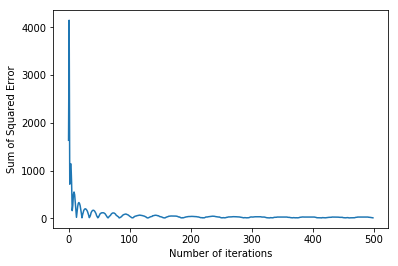

**************************************
Performing gradient descent for  0.01
Reached the end for iteration # 5
E =  1584.0
-----
Reached the end for iteration # 10
E =  66.0
-----
Reached the end for iteration # 50
E =  104.0
-----
Reached the end for iteration # 100
E =  186.0
-----
Reached the end for iteration # 500
E =  72.0
-----
**************************************
Performing gradient descent for  0.02
Reached the end for iteration # 5
E =  954.0
-----
Reached the end for iteration # 10
E =  1066.0
-----
Reached the end for iteration # 50
E =  352.0
-----
Reached the end for iteration # 100
E =  246.0
-----
Reached the end for iteration # 500
E =  142.0
-----
**************************************
Performing gradient descent for  0.03
Reached the end for iteration # 5
E =  2004.0
-----
Reached the end for iteration # 10
E =  510.0
-----
Reached the end for iteration # 50
E =  184.0
-----
Reached the end for iteration # 100
E =  272.0
-----
Reached the end for iteration # 500
E 

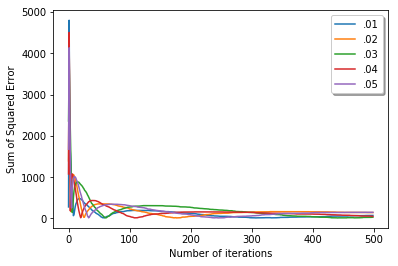

In [35]:
data = generate_data(-1000, 1000, 5000, 2)
n = 0.05
gradient_descent(data, n)
gradient_descent_ec(data)